# **Importing dependencies**



In [0]:
import pandas as pd
import os
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.optimizers import Adam
from pickle import load


In [133]:
# importing text with pandas
path = os.getcwd()
filepath = os.join.path(path,'hospital_names.txt')
df = pd.read_csv(filepath, sep='delimiter', header=None)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


# **Data Cleaning and Pre-processing**


*   Here I am removing all the repeated columns.
*   Then the characters are made into a sequence of 5 letters, where 4 characters are the input for the language model and the last character is the output.


*   Then these are tokenized.
*   And the outputs and inputs are converted to one-hot encoded vectors







In [134]:
# Removing Duplicate Values
df_new = df.drop_duplicates()
df_new['duplicates'] = df_new.duplicated()

df_new = df_new.drop('duplicates',axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# Concatenating all the names into a string.
string = ' '.join(df_new[0])
string
string = string.replace(',',' ')
string
# string_list = string.split(' ')


In [215]:
# Getting Unique Characters from the corpous.
chars = sorted(list(set(string)))
mapping = dict((c,i) for i,c in enumerate(chars))
mapping

{' ': 0,
 '&': 1,
 "'": 2,
 '(': 3,
 ')': 4,
 '-': 5,
 '.': 6,
 'A': 7,
 'B': 8,
 'C': 9,
 'D': 10,
 'E': 11,
 'F': 12,
 'G': 13,
 'H': 14,
 'I': 15,
 'J': 16,
 'K': 17,
 'L': 18,
 'M': 19,
 'N': 20,
 'O': 21,
 'P': 22,
 'Q': 23,
 'R': 24,
 'S': 25,
 'T': 26,
 'U': 27,
 'V': 28,
 'W': 29,
 'X': 30,
 'Y': 31,
 'Z': 32,
 'a': 33,
 'b': 34,
 'c': 35,
 'd': 36,
 'e': 37,
 'f': 38,
 'g': 39,
 'h': 40,
 'i': 41,
 'j': 42,
 'k': 43,
 'l': 44,
 'm': 45,
 'n': 46,
 'o': 47,
 'p': 48,
 'q': 49,
 'r': 50,
 's': 51,
 't': 52,
 'u': 53,
 'v': 54,
 'w': 55,
 'x': 56,
 'y': 57,
 'z': 58,
 '–': 59}

 **Creating a sequence of characters of length 5, where 4 characters are used as input and last cahracter is used as label for the language model training**
 

In [0]:
length = 4
sequences4 = list()
for i in range(length, len(string)):
	
	seq = string[i-length:i+1]
	
	sequences4.append(seq)

In [0]:
vocab_size = len(mapping)

**Numericalizing the text and converting them into one-hot encoded vectors**

In [0]:
sequences = list()
for line in sequences4:
	# integer encode line
	encoded_seq = [mapping[char] for char in line]
	# store
	sequences.append(encoded_seq)

In [181]:
sequences[:5]

array([[ 7,  9, 19, 14,  0],
       [ 9, 19, 14,  0, 14],
       [19, 14,  0, 14, 47],
       [14,  0, 14, 47, 51],
       [ 0, 14, 47, 51, 48]])

In [0]:


sequences = np.array(sequences)
x = sequences[:,:-1]
y = sequences[:,-1]

In [0]:
x,y

In [0]:

x = np.array([to_categorical(X,num_classes=vocab_size) for X in x])
y = to_categorical(y,num_classes = vocab_size)

In [145]:
x.shape

(81587, 4, 60)

# **Training**


*   Here I am using LSTM to train the character-level language model.


*   I have trained three different models with different hyperparameters, all these models are multi-stacked with two lstm layers and two dense layers.



* Best model will be considered for Text generation.




In [0]:
def model(vocab_size, seq_length):
  model = Sequential()
 
  model.add (LSTM(50,input_shape=(x.shape[1], x.shape[2]),return_sequences=True))
  model.add(Dropout(0.2))

  model.add(LSTM(50))
 
  model.add(Dense(50,activation='relu'))
  model.add(Dense(vocab_size,activation='softmax'))
  optimizer = Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  model.summary
  return model

**First model**
* Number of epochs = 50
* Number of hidden units in LSTM = 50


In [0]:
model = model(vocab_size,4)

In [196]:
fit1 = model.fit(x,y,epochs=50,verbose=2)

Epoch 1/50
 - 26s - loss: 2.1623 - acc: 0.4253
Epoch 2/50
 - 26s - loss: 1.5300 - acc: 0.5778
Epoch 3/50
 - 25s - loss: 1.3819 - acc: 0.6147
Epoch 4/50
 - 25s - loss: 1.2963 - acc: 0.6369
Epoch 5/50
 - 24s - loss: 1.2385 - acc: 0.6544
Epoch 6/50
 - 24s - loss: 1.1898 - acc: 0.6672
Epoch 7/50
 - 24s - loss: 1.1537 - acc: 0.6761
Epoch 8/50
 - 24s - loss: 1.1253 - acc: 0.6844
Epoch 9/50
 - 24s - loss: 1.1018 - acc: 0.6909
Epoch 10/50
 - 25s - loss: 1.0801 - acc: 0.6960
Epoch 11/50
 - 24s - loss: 1.0605 - acc: 0.7018
Epoch 12/50
 - 25s - loss: 1.0486 - acc: 0.7046
Epoch 13/50
 - 26s - loss: 1.0328 - acc: 0.7095
Epoch 14/50
 - 24s - loss: 1.0199 - acc: 0.7121
Epoch 15/50
 - 25s - loss: 1.0096 - acc: 0.7145
Epoch 16/50
 - 25s - loss: 0.9978 - acc: 0.7164
Epoch 17/50
 - 24s - loss: 0.9910 - acc: 0.7183
Epoch 18/50
 - 24s - loss: 0.9838 - acc: 0.7192
Epoch 19/50
 - 24s - loss: 0.9714 - acc: 0.7225
Epoch 20/50
 - 24s - loss: 0.9669 - acc: 0.7237
Epoch 21/50
 - 25s - loss: 0.9591 - acc: 0.7255
E

In [200]:

history_dic = fit1.history
history_dic.keys()

dict_keys(['loss', 'acc'])

In [0]:

loss_values = history_dic['loss']
acc_values = history_dic['acc']
epochs = range(1,len(history_dic['acc'])+1)

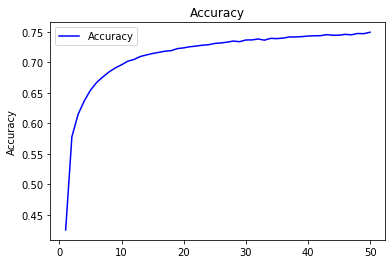

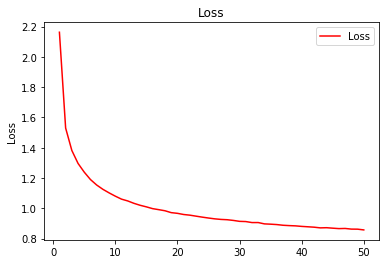

In [207]:

plt.plot(epochs, acc_values, 'b', label = 'Accuracy')
# plt.plot(epochs, loss_values,'b+', label = 'Loss')
plt.title('Accuracy')
plt.xticks()
plt.ylabel('Accuracy')
plt.yticks()
plt.legend()
plt.show()

plt.plot(epochs, loss_values, 'r', label = 'Loss')
# plt.plot(epochs, loss_values,'b+', label = 'Loss')
plt.title('Loss')
plt.xticks()
plt.ylabel('Loss')
plt.yticks()
plt.legend()
plt.show()



**model 2**

* Number of Epochs = 100
* Number of Hidden Units in each LSTM = 50

In [0]:
model2 = model(vocab_size,4)

In [213]:
fit2 = model2.fit(x,y,epochs=100,verbose=2)

Epoch 1/100
 - 28s - loss: 2.1495 - acc: 0.4268
Epoch 2/100
 - 26s - loss: 1.5283 - acc: 0.5789
Epoch 3/100
 - 25s - loss: 1.3839 - acc: 0.6134
Epoch 4/100
 - 26s - loss: 1.2997 - acc: 0.6359
Epoch 5/100
 - 26s - loss: 1.2391 - acc: 0.6522
Epoch 6/100
 - 25s - loss: 1.1996 - acc: 0.6639
Epoch 7/100
 - 25s - loss: 1.1612 - acc: 0.6727
Epoch 8/100
 - 25s - loss: 1.1300 - acc: 0.6827
Epoch 9/100
 - 26s - loss: 1.1045 - acc: 0.6881
Epoch 10/100
 - 25s - loss: 1.0843 - acc: 0.6936
Epoch 11/100
 - 25s - loss: 1.0691 - acc: 0.6985
Epoch 12/100
 - 25s - loss: 1.0509 - acc: 0.7026
Epoch 13/100
 - 26s - loss: 1.0379 - acc: 0.7057
Epoch 14/100
 - 27s - loss: 1.0223 - acc: 0.7100
Epoch 15/100
 - 25s - loss: 1.0130 - acc: 0.7132
Epoch 16/100
 - 26s - loss: 1.0019 - acc: 0.7157
Epoch 17/100
 - 26s - loss: 0.9938 - acc: 0.7176
Epoch 18/100
 - 26s - loss: 0.9848 - acc: 0.7189
Epoch 19/100
 - 25s - loss: 0.9764 - acc: 0.7203
Epoch 20/100
 - 25s - loss: 0.9691 - acc: 0.7235
Epoch 21/100
 - 25s - loss: 0

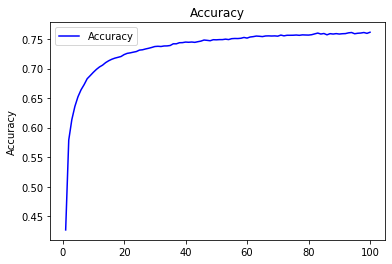

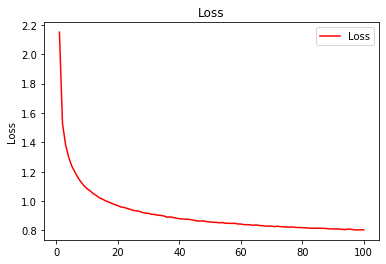

In [218]:
history_dic2 = fit2.history
history_dic2.keys()
loss_values2 = history_dic2['loss']
acc_values2 = history_dic2['acc']
epochs2 = range(1,len(history_dic2['acc'])+1)


plt.plot(epochs2, acc_values2, 'b', label = 'Accuracy')
# plt.plot(epochs, loss_values,'b+', label = 'Loss')
plt.title('Accuracy')
plt.xticks()
plt.ylabel('Accuracy')
plt.yticks()
plt.legend()
plt.show()

plt.plot(epochs2, loss_values2, 'r', label = 'Loss')
# plt.plot(epochs, loss_values,'b+', label = 'Loss')
plt.title('Loss')
plt.xticks()
plt.ylabel('Loss')
plt.yticks()
plt.legend()
plt.show()


In [219]:
vocab_size

60

**Model 3**

* Number of epochs = 100
* Number of hidden units in LSTM = 256



In [0]:
def model2(vocab_size, seq_length):
  model = Sequential()
  # model.add(Embedding(x.shape[2],x.shape[1],input_length=x.shape[1]))
  model.add (LSTM(256,input_shape=(x.shape[1], x.shape[2]),return_sequences=True))
  model.add(Dropout(0.2))

  model.add(LSTM(256))
  # model.add(LSTM(50))
  model.add(Dense(50,activation='relu'))
  model.add(Dense(vocab_size,activation='softmax'))
  optimizer = Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  model.summary
  return model

In [222]:
model3 = model2(vocab_size,4)
fit3 = model3.fit(x,y,epochs=100,verbose=2)

Epoch 1/100
 - 85s - loss: 1.7893 - acc: 0.5198
Epoch 2/100
 - 84s - loss: 1.2562 - acc: 0.6501
Epoch 3/100
 - 85s - loss: 1.1040 - acc: 0.6912
Epoch 4/100
 - 83s - loss: 1.0092 - acc: 0.7151
Epoch 5/100
 - 83s - loss: 0.9423 - acc: 0.7307
Epoch 6/100
 - 83s - loss: 0.8900 - acc: 0.7435
Epoch 7/100
 - 83s - loss: 0.8534 - acc: 0.7516
Epoch 8/100
 - 83s - loss: 0.8226 - acc: 0.7588
Epoch 9/100
 - 83s - loss: 0.7954 - acc: 0.7648
Epoch 10/100
 - 83s - loss: 0.7722 - acc: 0.7715
Epoch 11/100
 - 84s - loss: 0.7535 - acc: 0.7743
Epoch 12/100
 - 83s - loss: 0.7373 - acc: 0.7779
Epoch 13/100
 - 82s - loss: 0.7219 - acc: 0.7822
Epoch 14/100
 - 84s - loss: 0.7100 - acc: 0.7838
Epoch 15/100
 - 83s - loss: 0.7007 - acc: 0.7859
Epoch 16/100
 - 82s - loss: 0.6916 - acc: 0.7890
Epoch 17/100
 - 84s - loss: 0.6840 - acc: 0.7890
Epoch 18/100
 - 84s - loss: 0.6744 - acc: 0.7925
Epoch 19/100
 - 84s - loss: 0.6694 - acc: 0.7938
Epoch 20/100
 - 82s - loss: 0.6634 - acc: 0.7944
Epoch 21/100
 - 83s - loss: 0

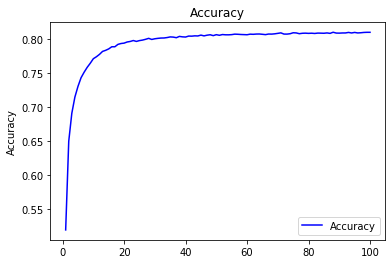

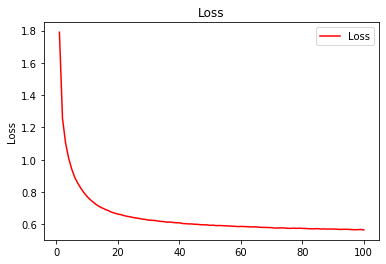

In [223]:
history_dic3 = fit3.history
history_dic3.keys()
loss_values3 = history_dic3['loss']
acc_values3 = history_dic3['acc']
epochs3 = range(1,len(history_dic3['acc'])+1)


plt.plot(epochs3, acc_values3, 'b', label = 'Accuracy')
# plt.plot(epochs, loss_values,'b+', label = 'Loss')
plt.title('Accuracy')
plt.xticks()
plt.ylabel('Accuracy')
plt.yticks()
plt.legend()
plt.show()

plt.plot(epochs3, loss_values3, 'r', label = 'Loss')
# plt.plot(epochs, loss_values,'b+', label = 'Loss')
plt.title('Loss')
plt.xticks()
plt.ylabel('Loss')
plt.yticks()
plt.legend()
plt.show()


In [216]:
len(mapping)

60

**Saving the model and Vocabulary**

In [0]:
from pickle import dump
# Saving the model.
model3.save('/content/drive/My Drive/model3.h5')
# Saving the Vocabulary
dump(mapping,open('/content/drive/My Drive/mapping.pkl','wb'))

# **Text Generation**
* First step is to load the pre-trained model and vocabulary

In [0]:


path = os.getcwd()
model_path = os.path.join(path,'model3.h5')
model_new = load_model(model_path,)
vocab_path = os.path.join(path,'mapping.pkl')
vocab = load(open(vocab_path,'rb'))

In [0]:

def hospital_name_generator(model, vocabulary, seq_length, input_text, max_chars):
	in_text = input_text
	for n in range(max_chars):
		# creating one-hot encoded vector of the input
		encoded = [vocabulary[char] for char in in_text]
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		encoded = to_categorical(encoded, num_classes=len(vocabulary))
		# predict character
		yhat = model.predict_classes(encoded, verbose=0)
		# from integer to character.
		out_char = ''
		for char, index in vocabulary.items():
			if index == yhat:
				out_char = char
				break
		# append to input
		in_text += char
	return in_text

#**Testing**

**Please assing the any four letters to the input_text. The model Should Return a new Hospital Name, which is 20 Characters of length.**

**Example 1**


In [250]:
input_text = 'Amul'# Enter the 4 input Characters Here
model = model3

result = generate_seq(model,vocab,4,input_text,20)
result


'Amulbert Worth Hospital '

**Example 2**


In [251]:
input_text = 'Bolr'# Enter the 4 input Characters Here
model = model3

result = generate_seq(model,vocab,4,input_text,20)
result


'Bolr Medical Center St. '

****Example 3****

In [253]:
input_text = 'Care'# Enter the 4 input Characters Here
model = model3

generate_seq(model,vocab,4,input_text,20)



'Care System - Mercy Hosp'

**Testing**

In [0]:
input_text = ''# Enter the 4 input Characters Here
model = model3

generate_seq(model,vocab,4,input_text,20)
